_________________________________________________________
## Title : Boxing Fighter Pay - Multiple Regression

- Author: Izaan Khudadad
- Email : ikhudada@charlotte.edu
- Affiliation: University of North Carolina at Charlotte

Categories:

- Correlation
- Multiple Regression
- Summary Statistics 
- Linear Regression 
_________________________________________________________

### Introduction

In the following activity, you will use data compiled by Peter Anderson from the Nevada State Athletic Commission(NSAC) and the California State Athletic Commission(CSAC). The dataset covers professional boxing fights held between 2009 and 2017, which includes individual fighters, their opponents, fight characteristics, broadcasting networks, and fighter earnings. 

Each observation represents a single fighter in a given bout, forming a structure that enables tracking of fighters over time.

Using this data, you will work on how various variables are correlated to fighter purse amount, as well as learn about how to determine the quality of a regression model.

By the end of the activity you should be able to: 
1. Use Python to create models based on more than two predictors. 
2. Understand what Root Mean Squared Error(RMSE) is in the context of multiple regression. 
3. Look at Residual plots to determine the quality of linear regression models. 
4. Use a variety of Python Libraries such as MatplotLib, Numpy, and Seaborn in creating models. 

### Data

The dataset includes over 4,600 fight entries and more than 1,200 unique professional boxers. Each row represents one fighter in one fight.

[Boxing Fighter Pay CSV](https://github.com/izaan-khudadad/Boxing_Fighter_Pay/blob/main/Boxing_Pay_data_cleaned.csv#L1)

<details>
<summary><b>Variable Descriptions</b></summary>

| Variable | Description |
|--------------------|-----------------------------------------------------------------------------|
| Boxer              | Name of the boxer (Last, First)                                             |
| Date               | Date of the fight (YYYY.MM.DD)                                              |
| Purse              | Reported purse (fighter's earnings) in USD                                 |
| lnRPurse           | Natural logarithm of the purse (for regression use)                         |
| weight             | Weight of the boxer (in pounds)                                             |
| Age                | Age of the boxer at the time of the fight                                   |
| Wins               | Number of professional wins prior to the fight                              |
| Losses             | Number of professional losses prior to the fight                            |
| KO                 | Number of professional knockout wins prior to the fight                     |
| W-Title            | Indicator for world title bout (1 = yes, 0 = no)                            |
| PPV                | Fight was on Pay-Per-View (1 = yes, 0 = no)                                 |
| RDS                | Scheduled number of rounds                                                  |

**Data Source**

[Mendeley Data](https://data.mendeley.com/datasets/vpbsd5bryy/1)

**Solutions**

[Regression Solutions](https://github.com/izaan-khudadad/Boxing_Fighter_Pay/blob/main/MultipleRegressionBoxingSolutions.ipynb)

### Learning Goals
In this module, students will explore how to use multiple linear regression to model Boxing data. By building, evaluating, and interpreting regression models, students will practice core data science skills such as:
- Selecting and preparing predictor features/variables
- Understanding how each predictor influences the response
- Evaluating model performance using RMSE
- Diagnosing fit using residual plots
- Reading and interpreting a full regression summary

## Material

We will begin by importing some libraries and loading in our data.

In [2]:
# Import libraries for data handling and modeling

import pandas as pd # for handling data
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for nicer plots

# Import model tools

import statsmodels.api as sm # for statistical model summaries
from sklearn.linear_model import LinearRegression # for fitting linear regression
from sklearn.metrics import mean_squared_error # for calculating RMSE

In [ ]:
# Load the data
boxing = pd.read_csv("https://raw.githubusercontent.com/izaan-khudadad/Boxing_Fighter_Pay/refs/heads/main/Boxing_Pay_data_cleaned.csv", na_values=['?'])
boxing.info()

Multiple Linear Regression is a statistical technique used to predict the value of a response (dependent) variable using two or more predictor (independent) variables.

- The General Formula
​$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \ldots + \beta_p X_p + \epsilon$$




Let's build a multiple regression model predicting *lnRPurse* (log of fighter earnings) based on several predictors such as *Age*, *Wins*, and *W-Title*.

We use *lnRPurse* because it makes the data cleaner, the relationships clearer, and the model more accurate. Taking a log of the response is a common technique in regression when the data has a wide spread.  It also helps us talk about relative changes (percentages) instead of absolute dollars, which is often more meaningful.


In [4]:
# Assigning the data set to df(data frame)
df = boxing

# Drop rows with missing values in relevant columns
df = df[['lnRPurse', 'Age', 'Wins', 'KO', 'W-Title']].dropna()

# We use lnRPurse instead of Purse because the distribution of Purse is heavily skewed - with a few boxers earning huge amounts.
# Taking the log of Purse helps make the values more normally distributed, which is better for linear regression.
# Define X and y 
X = df[['Age', 'Wins', 'KO', 'W-Title']]
y = df['lnRPurse']

# Fit model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

RMSE (Root Mean Squared Error) tells us how far off our model's predictions are, on average, in the same units as the response variable.

In [5]:
# Predict on same data
y_pred = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.3f}")

RMSE: 0.904


RMSE of 0.904 means the model is fair, but not highly precise - it’s likely making larger errors for some cases.
A smaller RMSE (e.g., under 0.7) would suggest a tighter, more reliable fit.

In [6]:
# add constant term for intercept
x2 = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               lnRPurse   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2717.
Date:                Sat, 14 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:28:26   Log-Likelihood:                -6153.4
No. Observations:                4670   AIC:                         1.232e+04
Df Residuals:                    4665   BIC:                         1.235e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7036      0.080     96.114      0.0

Linear Regression Model Summary 

| Label | Meaning |
|--------------------|-----------------------------------------------------------------------------|
| Dep. Variable              |  This is the variable you're trying to predict: lnRPurse (log of fighter's earnings/purse)                                            |
| R-squared               | 0.700 → 70% of the variation in lnRPurse can be explained by the model                                            |
| Adj. R-squared             | Adjusted for number of predictors; still 0.699, which means no overfitting                                       |
| F-statistic             | Tests whether your regression model provides a better fit to the data than a model with no predictors at all (i.e., just an intercept)                                 |
| P > t | The P-value tells us whether that specific variable is statistically significant in explaining the outcome |

The coefficient(coef) shows each variable and how they impact the prediction. 

Variables:
- const: The y-intercept when all variables = 0 is 7.7036

- Age: Each additional year of age is predicted to decrease log earnings slightly (-0.0136) as older fighters earn less assuming the other predictors remain fixed.

- Wins: Each additional win is predicted to add 0.0837 to log earnings as winning increases purse with the other predictors held fixed.

- KO: Each knockout is predicted to add 0.019 to log earnings with the other predictors held fixed.

- W-Title: Having a world title is predicted to add 1.96 to log earnings assuming other predictors remain the same.

### Residual Plot ###

#### What are residuals? ####

Residuals are the differences between actual values and predicted values:

Residual=Actual Value−Predicted Value

A residual plot shows prediction errors. Ideally, they should be randomly scattered, which indicates the model fits well.  Randomly scattered here means that the residuals have the same mean (zero) and the same variability as the predicted values change.

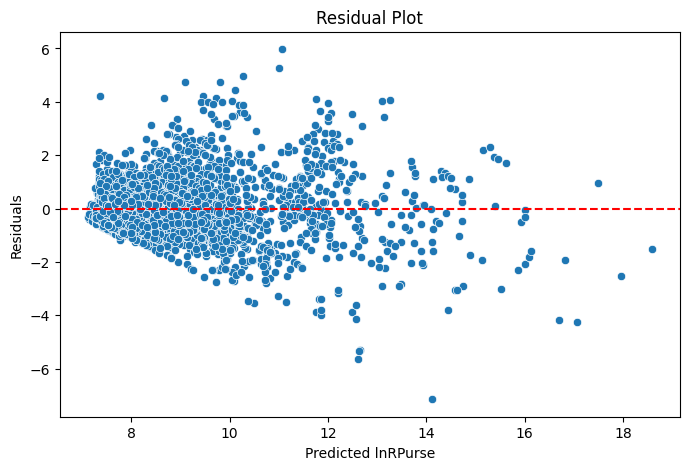

In [7]:
# Plot residuals to check how well the model fits the data
residuals = y - y_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted lnRPurse")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

This plot shows the residuals - the differences between the actual values of lnRPurse and the values predicted by our regression model. Each dot is one observation (a boxer), showing how far off the prediction was. 
The red line is called the zero-residual line. It shows where the model's predictions are exactly correct - meaning the predicted value perfectly matches the actual value. 

This residual plot shows some evidence of non-constant variance - the residuals fan out as predicted earnings increase.
This suggests the model may be less accurate for high earners, and that the assumption of equal variance is not fully met.  Not every regression that model that we fit will be appropriate to use for prediction.

### Conclusion
In the provided material, students explored how to use multiple linear regression to model Boxing data. By building, evaluating, and interpreting regression models, students practiced core data science skills such as:
- Selecting and preparing predictor variables
- Understanding how each predictor influences the response
- Evaluating model performance using RMSE
- Diagnosing fit using residual plots
- Reading and interpreting a full regression summary

### Activity ###
1. Now build a model predicting lnRPurse using weight, RDS, Wins, and PPV. Print a model summary as well.
2. Interpret the coefficients and how they affect the prediction.  
3. Calculate the RMSE, then explain what it means in the context of the data. 
4. Create a residual plot for your model, explain what it shows in the context of the data.
5. Which of these residual plots best shows a well-fit linear model?

**A.**
<img src="https://raw.githubusercontent.com/izaan-khudadad/Boxing_Fighter_Pay/main/residual_plot_A.png" width="400"/>

**B.**
<img src="https://raw.githubusercontent.com/izaan-khudadad/Boxing_Fighter_Pay/main/residual_plot_B.png" width="400"/>

**C.**
<img src="https://raw.githubusercontent.com/izaan-khudadad/Boxing_Fighter_Pay/main/residual_plot_C.png" width="400"/>

**D.**
<img src="https://raw.githubusercontent.com/izaan-khudadad/Boxing_Fighter_Pay/main/residual_plot_D.png" width="400"/>
